# Lecture 2

## Exercise 2.1

We want to evluate the following integral:
$$I=\int_0^1\dfrac{\pi}{2} \cos \left(\dfrac{\pi}{2} x \right) dx (=1)$$
in two differen ways: with a uniform distribution in $[0,1]$ and using importance sampling (i.e. a non uniform distribution in the same interval). In both cases we make $10^4$ estimation, divided into 100 equal blocks.

### uniform distribution

I and its error for the 100th block=
0.997939 0.00528403


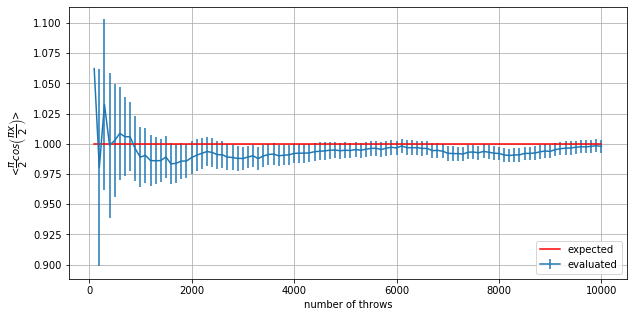

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

x,y,error=np.loadtxt("es2.1/Uniform.txt", usecols=(0,1,2), delimiter=" ", unpack='true')
plt.figure(0,figsize=(10,5))
expected=np.zeros(len(x))
expected.fill(1)
plt.plot(x*100,expected,color='red',label='expected')
plt.errorbar(x*100,y,yerr=error,label='evaluated')
plt.xlabel('number of throws')
plt.ylabel(r'<$\dfrac{\pi}{2}cos\left(\dfrac{\pi x}{2} \right)$>')
plt.legend(loc='lower right')
plt.grid(True)

print("I and its error for the 100th block=")
print(y[99],error[99])

plt.show()

### importance sampling 

We use the probability distribution $p(x)=2(1-x)$

I and its error for the 100th block=
1.00152 0.00126995


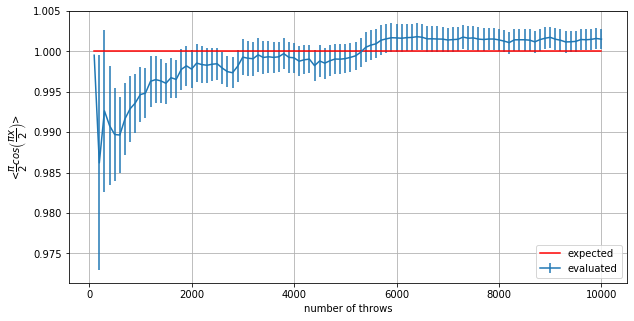

In [2]:
x,y,error=np.loadtxt("es2.1/ImportanceSampling.txt", usecols=(0,1,2), delimiter=" ", unpack='true')
plt.figure(0,figsize=(10,5))
expected=np.zeros(len(x))
expected.fill(1)
plt.plot(x*100,expected,color='red',label='expected')
plt.errorbar(x*100,y,yerr=error,label='evaluated')
plt.xlabel('number of throws')
plt.ylabel(r'<$\dfrac{\pi}{2}cos\left(\dfrac{\pi x}{2} \right)$>')
plt.legend(loc='lower right')
plt.grid(True)

print("I and its error for the 100th block=")
print(y[99],error[99])

plt.show()

We can see that, after $10^4$ estimation, the value of the integral is nearly the same, but the importance sampling method produces an error four time smaller than uniform sampling ($0,0012$ instead of $0,0053$).

## Exercise 2.2

We simulate a 3D random walk both on a cubic lattice with lattice constant $a=1$ and in the continuum. We repeat the simulation of the RW $10^4$ times, always starting in the origin and walking for 100 steps. The following plots represent $\sqrt{<|\vec{r_n}|^2>}$, i.e. the average distance between the origin and the $n^{th}$ step. Both can be fitted with $f(n)=k\sqrt{n}$.

#### Cubic Lattice
Starting from the origin, at each discrete time, we walk forward or backward for a distance $a$ in one of the three directions of the lattice: $x$, $y$ or $z$.

optimized parameter k=
[0.99616739]
parameters uncertainty=
[0.00015774]


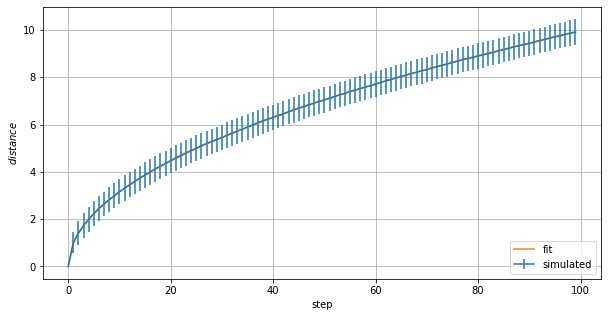

In [3]:
from scipy.optimize import curve_fit

def f(x,k):
    return k*(x**0.5)

x,y,error=np.loadtxt("es2.2/discrete.txt", usecols=(0,1,2), delimiter=" ", unpack='true')
plt.figure(0,figsize=(10,5))
plt.errorbar(x,y,yerr=error,label='simulated')
plt.xlabel('step')
plt.ylabel(r'$distance$')
p_opt,p_cov=curve_fit(f,x,y,bounds=([0],[2]))
y_fit=f(x,p_opt[0])
plt.plot(x,y_fit,label='fit')
plt.legend(loc='lower right')
plt.grid(True)

print("optimized parameter k=")
print(p_opt)
print("parameters uncertainty=")
print(np.sqrt(np.diagonal(p_cov)))

plt.show()

#### Continuum
Starting from the origin, at each discrete time we make a step of lenght $a$ along a random direction, obtained sampling uniformly the solid angle ($\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$).

optimized parameter k=
[1.00101887]
parameters uncertainty=
[0.00026862]


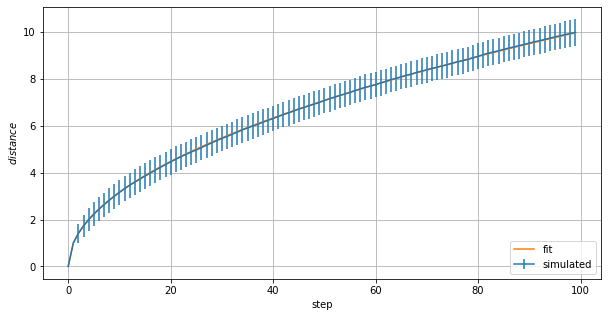

In [4]:
x,y,err=np.loadtxt("es2.2/continuum.txt", usecols=(0,1,2), delimiter=" ", unpack='true')
plt.figure(0,figsize=(10,5))
plt.errorbar(x,y,yerr=err,label='simulated')
plt.xlabel('step')
plt.ylabel(r'$distance$')
p_opt,p_cov=curve_fit(f,x,y,bounds=([0],[2]))
y_fit=f(x,p_opt[0])
plt.plot(x,y_fit,label='fit')
plt.legend(loc='lower right')
plt.grid(True)

print("optimized parameter k=")
print(p_opt)
print("parameters uncertainty=")
print(np.sqrt(np.diagonal(p_cov)))

plt.show()